In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
df = pd.read_csv('user_movie_view.csv')

In [3]:
df.drop(df[df['movieId'] !=551].index, inplace=True)

In [4]:
df['tstamp'] = pd.to_datetime(df['tstamp'])

In [5]:
start = df['tstamp'].min()
end = df['tstamp'].max()
df2 = pd.DataFrame(columns=['timestamp','number_of_views'])
delta = datetime.timedelta(days=30)
i = 0
print(start)
print(end)
while start <= end:
    count = 0
    for t in df.tstamp:
        if start<=t<start+delta:
            count +=1
    #print(start)
    #print(count)
    #print(i)
    df2.loc[i] = [start,count]
    i+=1
    start+= delta


2006-12-13 01:55:13
2020-06-20 12:37:32


Starting Decomposition

In [6]:
df2['number_of_views']=df2['number_of_views'].astype(float)

In [7]:
df2.set_index('timestamp',inplace=True)

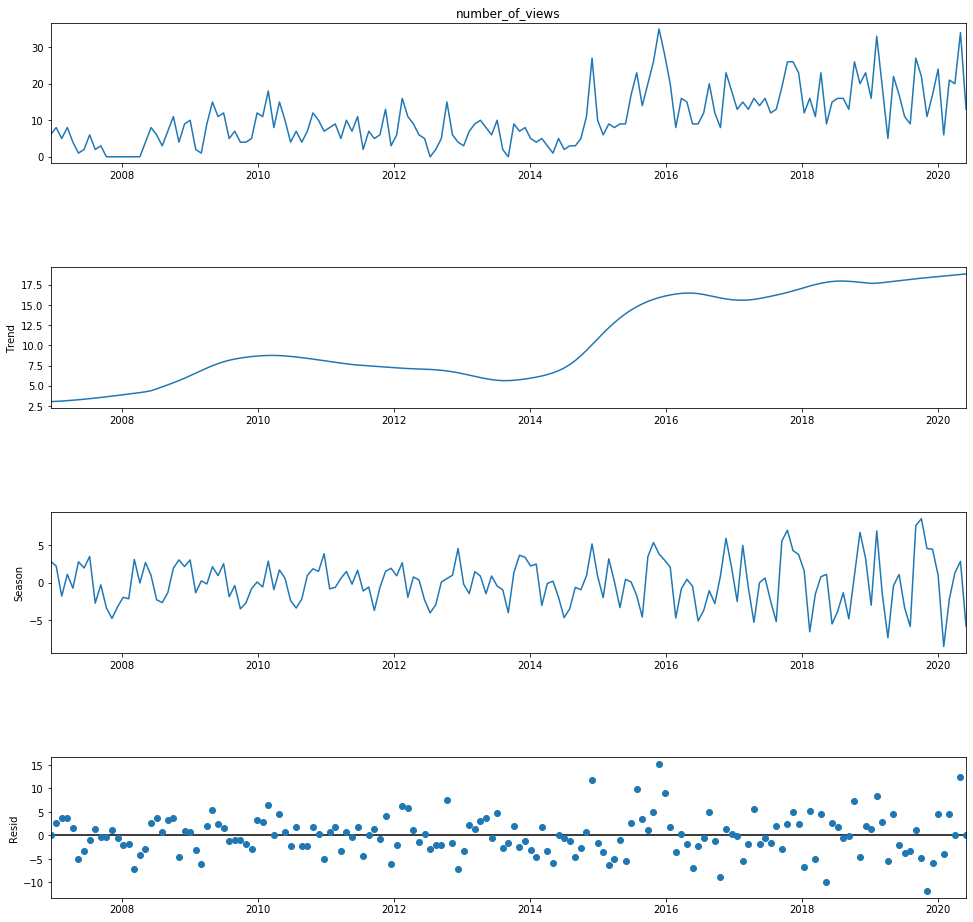

In [12]:
from statsmodels.tsa.seasonal import STL
pd.plotting.register_matplotlib_converters()
stl = STL(df2.number_of_views, seasonal=13,period=24)
res=stl.fit()
fig=res.plot()
fig.set_size_inches(15, 15)